In [1]:
from PIL import Image
from matplotlib import pyplot as plt

In [58]:
class FeatureSet:
    # Constructor (@param path of an image)
    def __init__(self, folder, name, ext):
        # Paths
        self.imagePath = "images/"+folder+'/'+name+'.'+ext;
        self.completeRGBDefHistPath = "histograms/"+folder+'/complete/counts/'+name+"."+ext;
        self.completeRGBPercHistPath = "histograms/"+folder+'/complete/percentages/'+name+"."+ext;
        self.bucketsRGBDefHistPath = "histograms/"+folder+'/buckets/counts/'+name+"."+ext;
        self.bucketsRGBPercHistPath = "histograms/"+folder+'/buckets/percentages/'+name+"."+ext;
        # Open an image at the path
        self.img = Image.open(self.imagePath)
        # The number of valid pixels 
        self.size = 0
        # for default histogram
        self.completeRGBDefHist = [[0]*256 for channel in range(3)]
        # for percentages histogram
        self.completeRGBPercHist = [[0]*256 for channel in range(3)]
    
    # Show the image
    def show(self):
        self.img.show()
    
    # Creation of the default histogram
    # Actually, with discrimination of blank pixels
    def createDefaultHist(self):
        for pixel in list(self.img.getdata()):
            # If the pixel is not blank
            if pixel[0] < 240 or pixel[1] < 240 or pixel[2] < 240:
                # Increase count in channels
                self.completeRGBDefHist[0][pixel[0]] += 1
                self.completeRGBDefHist[1][pixel[1]] += 1
                self.completeRGBDefHist[2][pixel[2]] += 1
                self.size += 1
                
    # Creation of percentage histogram
    def createPercentHist(self):
        for i in range(256):
            self.completeRGBPercHist[0][i] = self.completeRGBDefHist[0][i] / self.size
            self.completeRGBPercHist[1][i] = self.completeRGBDefHist[1][i] / self.size
            self.completeRGBPercHist[2][i] = self.completeRGBDefHist[2][i] / self.size
            
    # Creation of the buckets histogram
    def createBucketsDefHist(self, nBuckets):
        self.bucketsRGBDefHist = [[0] * nBuckets for channel in range(3)]
        bucketSize = 256 / nBuckets;
        for i in range(256):
            curBucket = int(i/bucketSize)
            self.bucketsRGBDefHist[0][curBucket] += self.completeRGBDefHist[0][i] / bucketSize
            self.bucketsRGBDefHist[1][curBucket] += self.completeRGBDefHist[1][i] / bucketSize
            self.bucketsRGBDefHist[2][curBucket] += self.completeRGBDefHist[2][i] / bucketSize
    
    # Creation of buckets percentage histogram
    def createBucketsPercHist(self):
        nBuckets = len(self.bucketsRGBDefHist[0])
        bucketSize = 256 / nBuckets;
        self.bucketsRGBPercHist = [[0] * nBuckets for channel in range(3)]
        for i in range(256):
            curBucket = int(i/bucketSize)
            self.bucketsRGBPercHist[0][curBucket] += self.completeRGBPercHist[0][i] / bucketSize
            self.bucketsRGBPercHist[1][curBucket] += self.completeRGBPercHist[1][i] / bucketSize
            self.bucketsRGBPercHist[2][curBucket] += self.completeRGBPercHist[2][i] / bucketSize
    
    # Creation of the 4 histograms
    def createHistograms(self):
        self.createDefaultHist()
        self.createPercentHist()
        self.createBucketsDefHist(16)
        self.createBucketsPercHist()
    
    # Saving the histograms
    def saveHistograms(self):
        # Complete Default Histogram
        plt.clf()
        plt.plot(self.completeRGBDefHist[0], color='r')
        plt.plot(self.completeRGBDefHist[1], color='g')
        plt.plot(self.completeRGBDefHist[2], color='b')
        plt.savefig(self.completeRGBDefHistPath)
        # Complete Percentages Histogram
        plt.clf()
        plt.plot(self.completeRGBPercHist[0], color='r')
        plt.plot(self.completeRGBPercHist[1], color='g')
        plt.plot(self.completeRGBPercHist[2], color='b')
        plt.savefig(self.completeRGBPercHistPath)
        # N Buckets Default Histogram
        plt.clf()
        plt.plot(self.bucketsRGBDefHist[0], color='r')
        plt.plot(self.bucketsRGBDefHist[1], color='g')
        plt.plot(self.bucketsRGBDefHist[2], color='b')
        plt.savefig(self.bucketsRGBDefHistPath)
        # N Buckets Percentages Histogram
        plt.clf()
        plt.plot(self.bucketsRGBPercHist[0], color='r')
        plt.plot(self.bucketsRGBPercHist[1], color='g')
        plt.plot(self.bucketsRGBPercHist[2], color='b')
        plt.savefig(self.bucketsRGBPercHistPath)
        
    # Overriting str method
    def __str__(self):
        text = ''
        text += self.imagePath + '\t'
        text += str(len(self.bucketsRGBPercHist[0])) + '\t'
        # Red channel
        for histVal in self.bucketsRGBPercHist[0]:
            text += str(round(histVal,3)) + ' '
        # Green channel
        text += '\t'
        for histVal in self.bucketsRGBPercHist[1]:
            text += str(round(histVal,3)) + ' '
        # Blue channel
        text += '\t'
        for histVal in self.bucketsRGBPercHist[2]:
            text += str(round(histVal,3)) + ' '
        # Completed
        return text

In [59]:
def main():
    # Opening the write file
    output = open("database.txt", "w")
    # Our categories list
    names = ['apple','carrot','orange','pear','pineapple']
    # The default extension of the files
    ext = 'jpg'
    # For every category
    for name in names:
        folder = name+'s'
        for i in range(10):
            item = name + str(i+1)
            image = FeatureSet(folder,item,ext);
            image.createHistograms()
            image.saveHistograms()
            output.write(str(image)+'\n')
            del image
    
    # Closing the write file
    output.close()

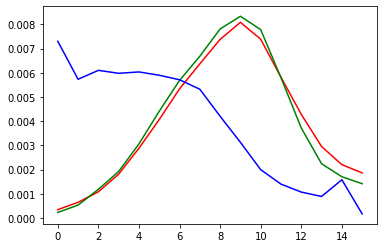

In [63]:
main()